Exploratory Factors Analysis

Importing necessary libraries and load the dataset of exoplanets

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv (r'/content/cleaned_5250.csv')
df

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764.0,10.52100,Gas Giant,2019,0.70900,Jupiter,1.373,Jupiter,0.044210,0.007940,0.04,Transit
5246,YSES 2 b,357.0,10.88500,Gas Giant,2021,6.30000,Jupiter,1.140,Jupiter,115.000000,1176.500000,0.00,Direct Imaging
5247,YZ Ceti b,12.0,12.07400,Terrestrial,2017,0.70000,Earth,0.913,Earth,0.016340,0.005476,0.06,Radial Velocity
5248,YZ Ceti c,12.0,12.07400,Super Earth,2017,1.14000,Earth,1.050,Earth,0.021560,0.008487,0.00,Radial Velocity


Checking the information of the dataset.

In [ ]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               5250 non-null   object 
 1   distance           5233 non-null   float64
 2   stellar_magnitude  5089 non-null   float64
 3   planet_type        5250 non-null   object 
 4   discovery_year     5250 non-null   int64  
 5   mass_multiplier    5227 non-null   float64
 6   mass_wrt           5227 non-null   object 
 7   radius_multiplier  5233 non-null   float64
 8   radius_wrt         5233 non-null   object 
 9   orbital_radius     4961 non-null   float64
 10  orbital_period     5250 non-null   float64
 11  eccentricity       5250 non-null   float64
 12  detection_method   5250 non-null   object 
dtypes: float64(7), int64(1), object(5)
memory usage: 533.3+ KB


Shape of original dataset

In [ ]:
df.shape

(5250, 13)

Statistical information about the dataset

In [ ]:
df.describe()

,distance,stellar_magnitude,discovery_year,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity
count,5233.000000,5089.000000,5250.000000,5227.000000,5233.000000,4961.000000,5.250000e+03,5250.000000
mean,2167.168737,12.683738,2015.732190,6.434812,1.015121,6.962942,4.791509e+02,0.063568
std,3245.522087,3.107571,4.307336,12.972727,0.603479,138.673600,1.680445e+04,0.141424
min,4.000000,0.872000,1992.000000,0.020000,0.200000,0.004400,2.737851e-04,-0.520000
25%,389.000000,10.939000,2014.000000,1.804000,0.325000,0.053000,1.259411e-02,0.000000
50%,1371.000000,13.543000,2016.000000,4.170140,1.120000,0.102800,3.449692e-02,0.000000
75%,2779.000000,15.021000,2018.000000,8.000000,1.410000,0.286000,1.442163e-01,0.060000
max,27727.000000,44.610000,2023.000000,752.000000,6.900000,7506.000000,1.101370e+06,0.950000


Detect the missing values  or Nan values

In [ ]:
df.isna ().sum ()

name                   0
distance              17
stellar_magnitude    161
planet_type            0
discovery_year         0
mass_multiplier       23
mass_wrt              23
radius_multiplier     17
radius_wrt            17
orbital_radius       289
orbital_period         0
eccentricity           0
detection_method       0
dtype: int64

Fix these missing values by replacing with zero.

In [43]:
df.fillna (0,inplace=True)

Testing after fixing the missing values.

In [44]:
df.isna ().sum ()

name                 0
distance             0
stellar_magnitude    0
planet_type          0
discovery_year       0
mass_multiplier      0
mass_wrt             0
radius_multiplier    0
radius_wrt           0
orbital_radius       0
orbital_period       0
eccentricity         0
detection_method     0
dtype: int64

Explanation : The worlds beyond our Solar System — known as exoplanets — do exist.

Objectives :The first objective is to find an essential clue towards understanding the universe.
The second is to find another world that hosts living organisms.
And the main objective of this work is to analyse some important and useful factors for prediction.

<Axes: >

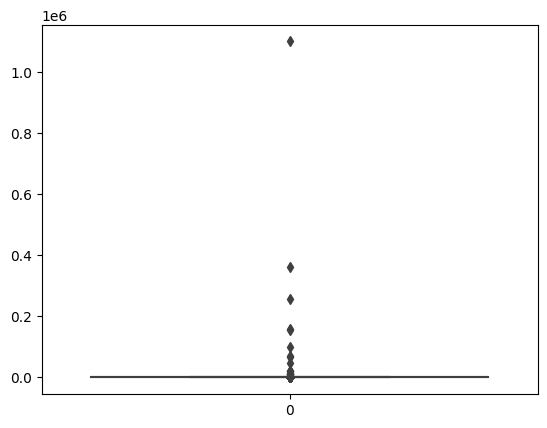

In [ ]:
sns.boxplot (df ["orbital_period"])

Visualisation distribution of the dataset

Histogram plot

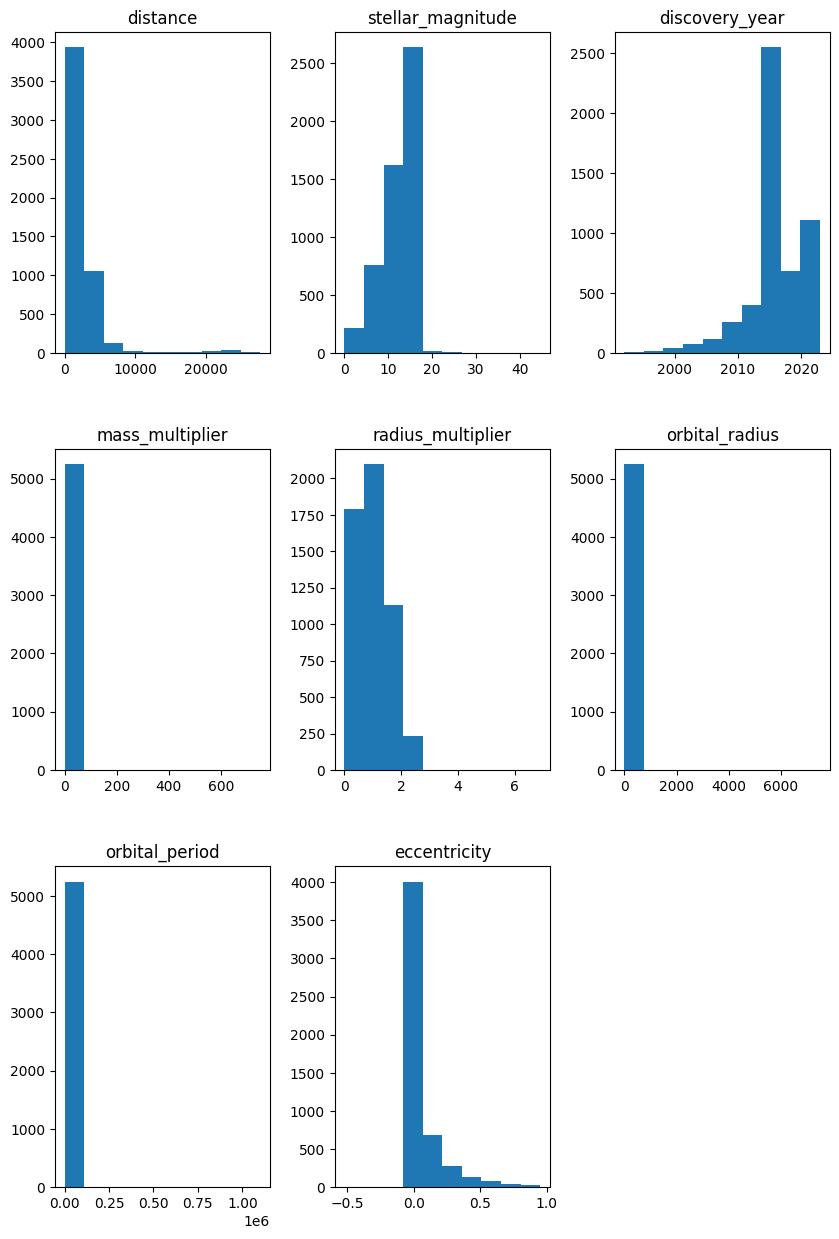

In [57]:
hist=df.hist (bins=10,figsize=(10,15),grid=False)

Density plot

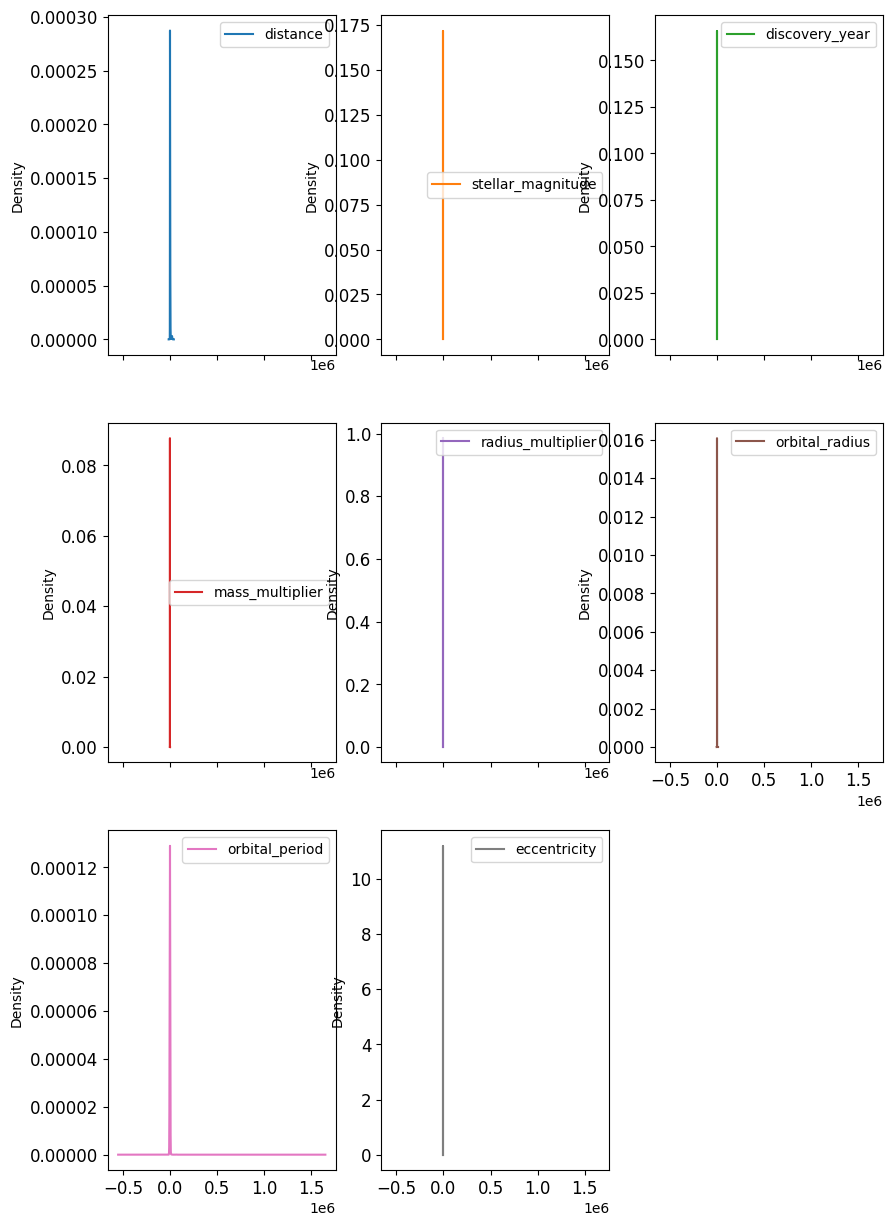

In [ ]:
plt=df.plot (kind="density",subplots=True,layout=(3,3),sharey=False,fontsize=12,figsize=(10,15))

Box plot

Outliers :An outlier is a single data point that goes far outside the average value of a group of statistics.

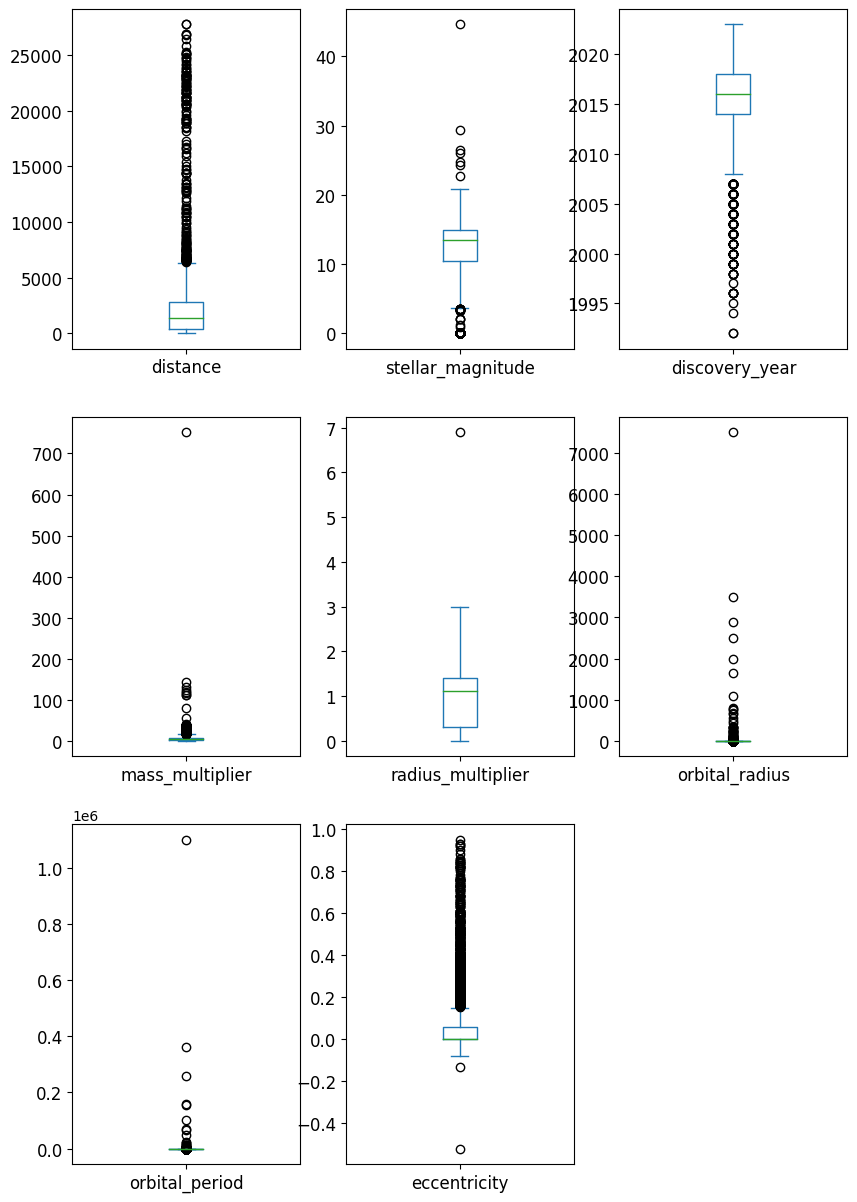

In [ ]:
plt=df.plot (kind="box",subplots=True,layout=(3,3),sharey=False,fontsize=12,figsize=(10,15))

Observation :An outlier is a data point that differs significantly from other observations.


The observable universe is approximately 93 billion light-years in diameter. This number is derived from several considerations. A light-year, the distance light can travel in one Earth year, is 9.46 trillion kilometres (5.88 trillion miles).(source-Google)


For example according to the astronomy of the space, the measurements of the "distance" will be increasing for every planet and other measurements.

So I can't consider these outliers  as an outliers.

Replace the object data to numerous data

In [45]:
df['planet_type']=df ['planet_type'].replace({'Gas Giant':'0','Neptune-like':'1','Super Earth':'2','Terrestrial':'3','Unknown':'4'})
df['planet_type']

0       0
1       0
2       0
3       0
4       0
       ..
5245    0
5246    0
5247    3
5248    2
5249    2
Name: planet_type, Length: 5250, dtype: object

In [46]:
df['mass_wrt']=df['mass_wrt'].replace ({'Jupiter':'0','Earth':'1'})
df['mass_wrt']

0       0
1       0
2       0
3       0
4       0
       ..
5245    0
5246    0
5247    1
5248    1
5249    1
Name: mass_wrt, Length: 5250, dtype: object

In [47]:
df['radius_wrt']=df['radius_wrt'].replace ({'Jupiter':'0','Earth':'1'})
df['radius_wrt']

0       0
1       0
2       0
3       0
4       0
       ..
5245    0
5246    0
5247    1
5248    1
5249    1
Name: radius_wrt, Length: 5250, dtype: object

In [48]:
df['detection_method']=df['detection_method'].replace ({'Radial Velocity':'0', 'Direct Imaging':'1', 'Eclipse Timing Variations':'2','Transit':'3', 'Astrometry':'4', 'Disk Kinematics':'5','Transit Timing Variations':'6', 'Orbital Brightness Modulation':'7','Pulsation Timing Variations':'8', 'Gravitational Microlensing':'9','Pulsar Timing':'10'})
df ['detection_method']

0       0
1       0
2       0
3       0
4       0
       ..
5245    3
5246    1
5247    0
5248    0
5249    0
Name: detection_method, Length: 5250, dtype: object

In [49]:
df.head ()

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,0,2007,19.40000,0,1.08,0,1.290000,0.892539,0.23,0
1,11 Ursae Minoris b,409.0,5.01300,0,2009,14.74000,0,1.09,0,1.530000,1.400000,0.08,0
2,14 Andromedae b,246.0,5.23133,0,2008,4.80000,0,1.15,0,0.830000,0.508693,0.00,0
3,14 Herculis b,58.0,6.61935,0,2002,8.13881,0,1.12,0,2.773069,4.800000,0.37,0
4,16 Cygni B b,69.0,6.21500,0,1996,1.78000,0,1.20,0,1.660000,2.200000,0.68,0


In [50]:
df=df.drop (columns ='name',axis=1)

In [51]:
df.shape

(5250, 12)

Factor analysis (FA) allows us to simplify a set of complex variables or items using statistical procedures to explore the underlying dimensions that explain the relationships between the multiple variables/items.

In [ ]:
pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 30.2 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42486 sha256=607e22dd0cd8e65d97411af159d433b719d2cb28d27545be23fca08ec1def3f6
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [52]:
from factor_analyzer import FactorAnalyzer

Fa = FactorAnalyzer()
Fa.fit (df)

FactorAnalyzer(rotation_kwargs={})

In [53]:
loadings =Fa.loadings_

In [55]:
#get the loading eigenvalues
ev,v=Fa.get_eigenvalues()

A scree plot is a line plot of the eigenvalues of factors or principal components in an analysis. The scree plot is used to determine the number of factors to retain in an exploratory factor analysis (FA).

Eigenvalues are a measure of the amount of variance accounted for by a factor, and so they can be useful in determining the number of factors that we need to extract. In a scree plot, we simply plot the eigenvalues for all of our factors, and then look to see where they drop off sharply.

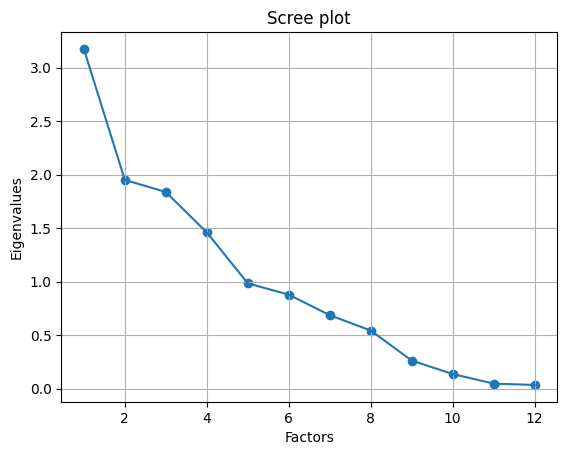

In [56]:
xvals=range (1,df.shape [1]+1)

plt.scatter (xvals,ev)
plt.plot (xvals,ev)
plt.xlabel("Factors")
plt.ylabel ("Eigenvalues")
plt.title ('Scree plot')
plt.grid ()
plt.show()

Real fact of Scree plot : If Eigenvalues is greater than one, we should consider that a factor and if Eigenvalues is less than one, then we should not consider that a factor. According to the variance extraction rule, it should be more than 0.7. If variance is less than 0.7, then we should not consider that a factor.